# Compara nodos para saber cuál es el que presenta los mejores datos para cada valriable y qué periodo de tiempo corresponden

In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import funs
import numpy as np
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:.2f}'.format

### Lee los nodos en un diccionario de dataframes

In [2]:
tablas={}
for nodo in [2,3,4,5,6,8]:
    tablas[nodo] = pd.read_csv('medidas_nodo%s'%nodo,parse_dates=True,index_col=0)

### Grafica los valores de las variables de cada nodo en gráficas interactivas

for nodo in [2,3,4,5,6,8]:
    data = ([{'x': tablas[nodo].index,'y': tablas[nodo][col],'name': col}
             for col in tablas[nodo].columns[0:4]])
    layout = dict(title = 'NODO %s' %nodo,
                  yaxis = dict(title = '°C, %RH, %Pw, Nivel UV'),
                  xaxis = dict(title = 'FECHA')
                 )
    fig = dict(data=data, layout=layout)
    iplot(fig,layout)

### Aplica funs.separa, obtine para cada nodo una lista de DF con los registros obtenidos entre periodos de medición con separación de más de t minutos

In [3]:
# Aplica la función separa_nodos, que calcula el tamaño de los dataframes entre periodos de medición con separación 
#edge"
t = 60 * 24
nodo, periodos = {}, {}
for i in [2,3,4,5,6,8]:
    nodo[i], periodos[i] = funs.separa_datos(tablas[i],t)

### Se obtiene la cantidad de periodos de medición de cada nodo, el rango de los datos y su tamaño

In [4]:
for i in periodos:
    print('\nNodo %s'%i)
    print('\n',periodos[i].iloc[:,[0,1,2,4]])


Nodo 2

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 09:38:00 2018-05-10 14:38:00        1722          98.91
1 2018-05-23 09:22:00 2018-05-26 07:01:00        4135          98.92
2 2018-06-05 10:11:00 2018-06-09 15:24:00        5138          84.59
3 2018-06-11 08:51:00 2018-06-11 09:17:00          27         100.00

Nodo 3

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 09:49:00 2018-05-10 14:38:00        1708          98.73
1 2018-05-23 09:59:00 2018-05-28 22:32:00        7931          99.71
2 2018-06-05 10:15:00 2018-06-08 18:40:00        4677          96.91
3 2018-06-11 08:56:00 2018-06-11 09:17:00          22         100.00

Nodo 4

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 10:36:00 2018-05-09 14:06:00         186          88.15
1 2018-05-23 10:22:00 2018-05-24 10:17:00         204          14.21

Nodo 5

      Registro Inicial      Registro Final  Registrado  Registra

In [5]:
# mr es la cantidad mínima de registros

mr = 1e3
for i in periodos:
    borrar =[]
    for j in periodos[i].index:
        if periodos[i].iloc[j,2] < mr:
            borrar.append(j)
            nodo[i][j]=np.nan
    periodos[i] = periodos[i].drop(index=borrar)
    nodo[i] = [nodo[i][x] for x in periodos[i].index if not(x in borrar)]

In [6]:
for i in periodos:
    print('\nNodo %s'%i)
    print('\n',periodos[i].iloc[:,[0,1,2,4]])


Nodo 2

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 09:38:00 2018-05-10 14:38:00        1722          98.91
1 2018-05-23 09:22:00 2018-05-26 07:01:00        4135          98.92
2 2018-06-05 10:11:00 2018-06-09 15:24:00        5138          84.59

Nodo 3

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 09:49:00 2018-05-10 14:38:00        1708          98.73
1 2018-05-23 09:59:00 2018-05-28 22:32:00        7931          99.71
2 2018-06-05 10:15:00 2018-06-08 18:40:00        4677          96.91

Nodo 4

 Empty DataFrame
Columns: [Registro Inicial, Registro Final, Registrado, Registrado(%)]
Index: []

Nodo 5

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 10:25:00 2018-05-10 14:37:00        1674          98.88
1 2018-05-23 10:08:00 2018-05-26 08:34:00        4203          99.43
2 2018-06-05 10:21:00 2018-06-11 09:17:00        5888          68.65

Nodo 6

      Registro Inicial    

### Se tienen tres periodos de medición
### Gráfica para el pirmer periodo

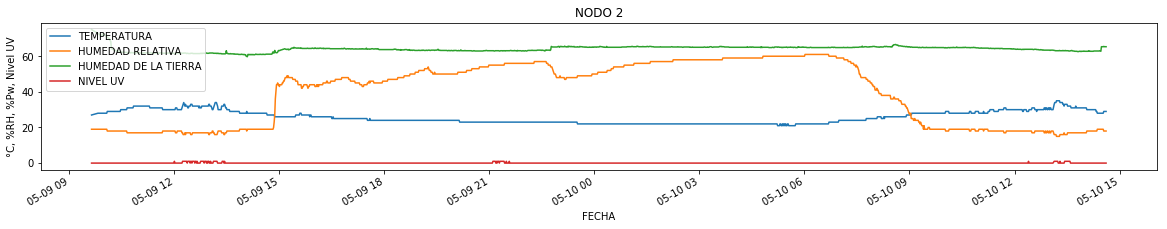

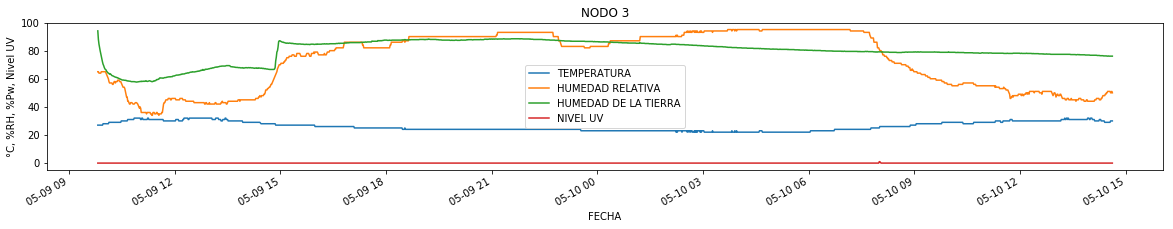

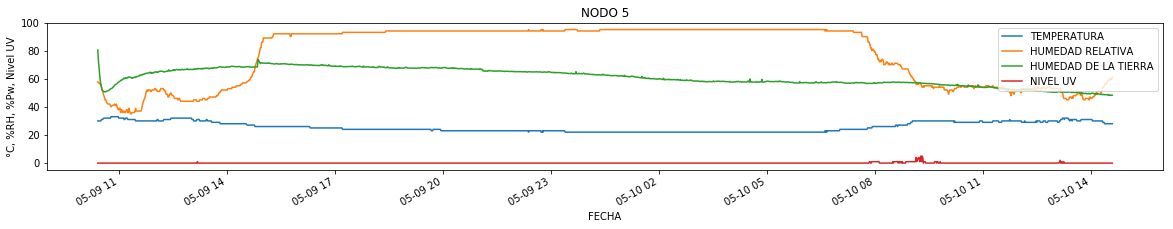

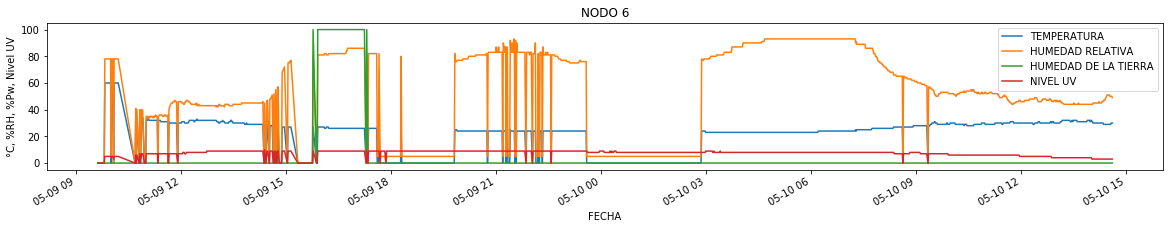

In [7]:
T = 0
for i in [2,3,5,6]:
    nodo[i][T].iloc[:,0:4].plot(figsize=[20,3])
    plt.title('NODO %s'%i)
    plt.xlabel('FECHA')
    plt.ylabel('°C, %RH, %Pw, Nivel UV')

In [8]:
nodo[6][0].mean()

TEMPERATURA              21.18
HUMEDAD RELATIVA         52.71
HUMEDAD DE LA TIERRA      5.14
NIVEL UV                  7.52
INTENSIDAD LUMÍNICA    3553.53
HORA                     11.43
dtype: float64

In [9]:
# Para el primer periodo los registros de los nodos 2, 3 y 5 presentan gran similitud, tanto para los 
# valores medidos de cada variable como para las fechas.

# En los registros del nodo 6 puede evidenciar que el nodo presentó fallas en diferentes momentos, 
# presentando periodos de hasta tres horas sin registrar datos de las variables Humedad Relativa y 
# Temperatura, los sensores digitales de HR y temperatura, la media de los valores de Nivel UV 
# registrados es de 7.52, lo que indica que este sensor podría estar defectuoso.

Text(0,0.5,'°C, %RH, %Pw, Nivel UV')

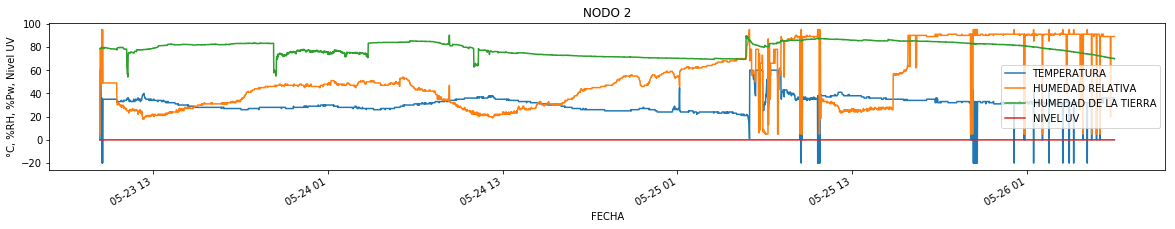

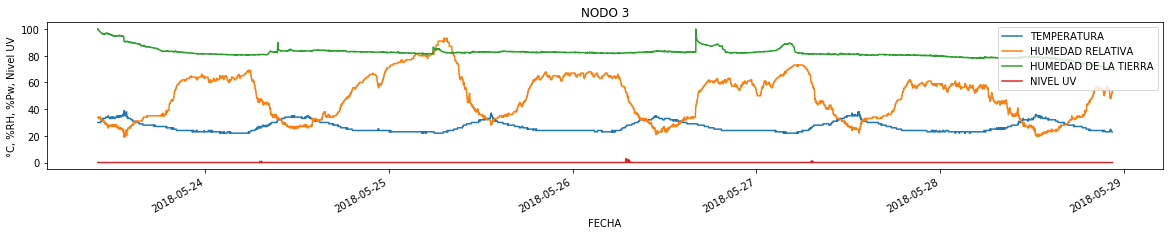

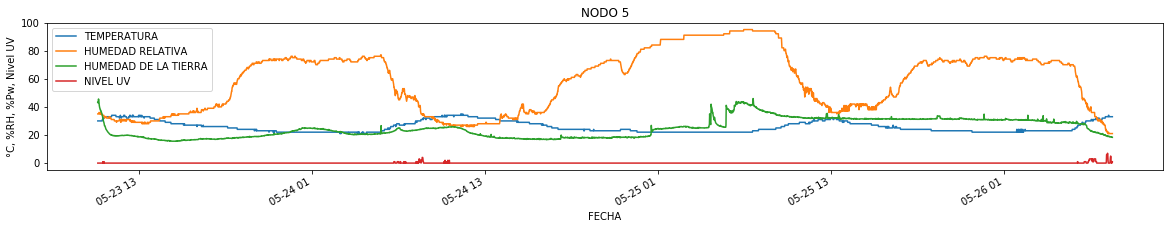

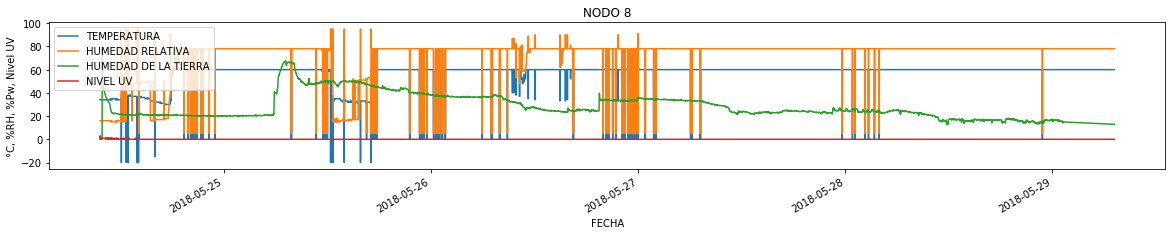

In [10]:
T = 1
for i in [2,3,5]:
    nodo[i][T].iloc[:,0:4].plot(figsize=[20,3])
    plt.title('NODO %s'%i)
    plt.xlabel('FECHA')
    plt.ylabel('°C, %RH, %Pw, Nivel UV')
nodo[8][0].iloc[:,0:4].plot(figsize=[20,3])
plt.title('NODO 8')
plt.xlabel('FECHA')
plt.ylabel('°C, %RH, %Pw, Nivel UV')

In [11]:
#Vamo a rajar del nodo 8 y del 2 que me va a dar problemas

Text(0,0.5,'°C, %RH, %Pw, Nivel UV')

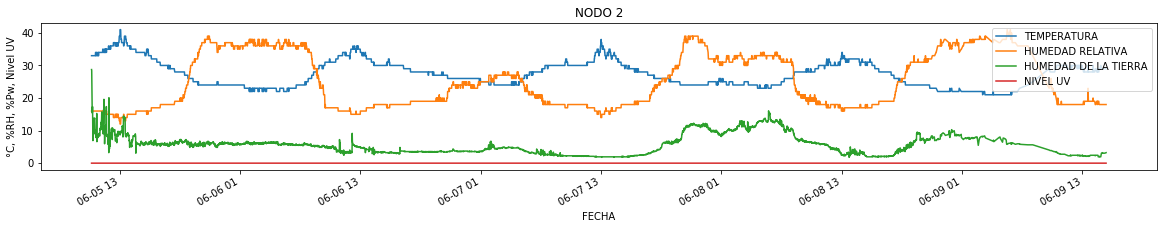

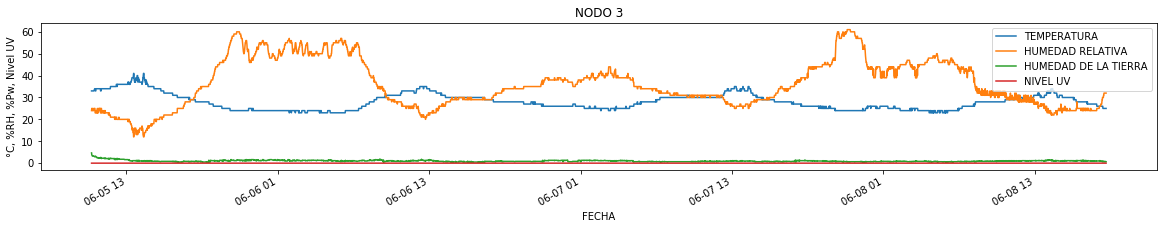

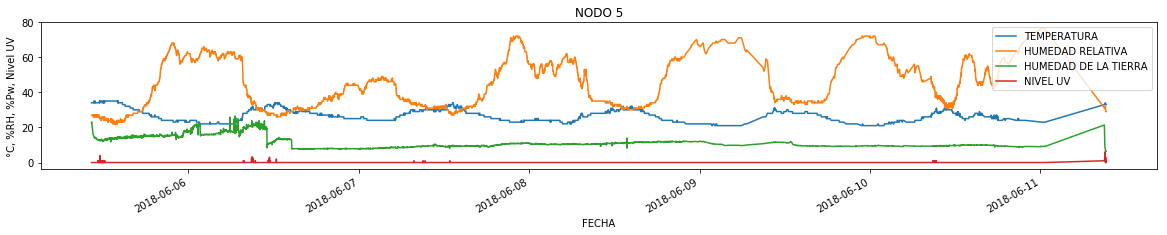

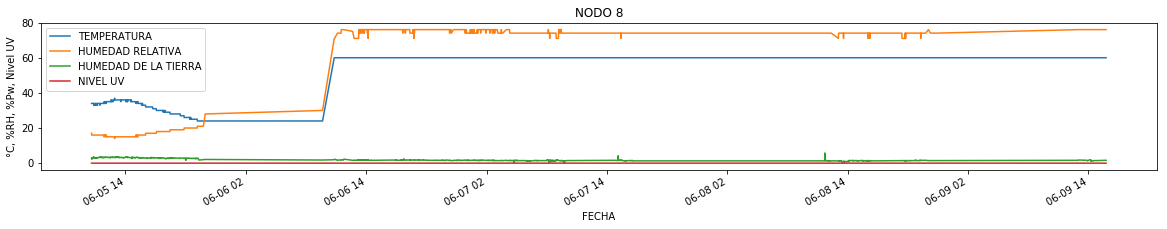

In [12]:
T = 2
for i in [2,3,5]:
    nodo[i][T].iloc[:,0:4].plot(figsize=[20,3])
    plt.title('NODO %s'%i)
    plt.xlabel('FECHA')
    plt.ylabel('°C, %RH, %Pw, Nivel UV')
nodo[8][1].iloc[:,0:4].plot(figsize=[20,3])
plt.title('NODO 8')
plt.xlabel('FECHA')
plt.ylabel('°C, %RH, %Pw, Nivel UV')

In [13]:
# Se presentan fallas en los sensores Temperatura y Humedad Relativa del nodo 8

# Nodos que presentan mediciones por más de un día con comportamiento similar al obervado en 
    # otros nodos
    #primer periodo nodos 2, 3 y 5
    # Segundo periodo nodos 2, 3 y 5
    # Tercer periodo 2, 3 y 5
    # Cuarto periodo: ninguno
    # Se decide trabajar con los registros de los nodos 2, 3 y 5, dado que presentan periodos de medición 
    # simultaneos y con úna cantidad de registros para los periodos de medición más semejantes superior o 
    # cercana a 5000 registros.
    # Los nodos 4 y 6 se descartan teniendo en cuenta la reducida cantidad de resitros para cada periodo
    # de medición y porque al igual que en el nodo 8, los errores superan el 50% de los registros.

In [14]:
periodos[2][1:3]

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
1,2018-05-23 09:22:00,2018-05-26 07:01:00,4135,45,98.92,1.08,2 days 21:39:00,10 days 03:10:00
2,2018-06-05 10:11:00,2018-06-09 15:24:00,5138,936,84.59,15.41,4 days 05:13:00,1 days 17:27:00


In [15]:
periodos[3][1:3]

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
1,2018-05-23 09:59:00,2018-05-28 22:32:00,7931,23,99.71,0.29,5 days 12:33:00,7 days 11:43:00
2,2018-06-05 10:15:00,2018-06-08 18:40:00,4677,149,96.91,3.09,3 days 08:25:00,2 days 14:16:00


In [16]:
periodos[5][1:3]

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
1,2018-05-23 10:08:00,2018-05-26 08:34:00,4203,24,99.43,0.57,2 days 22:26:00,10 days 01:47:00
2,2018-06-05 10:21:00,2018-06-11 09:17:00,5888,2689,68.65,31.35,5 days 22:56:00,0 days 00:00:00


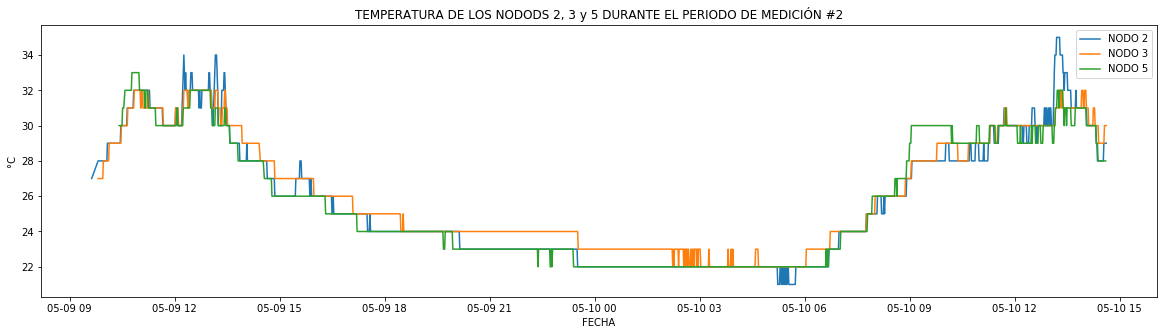

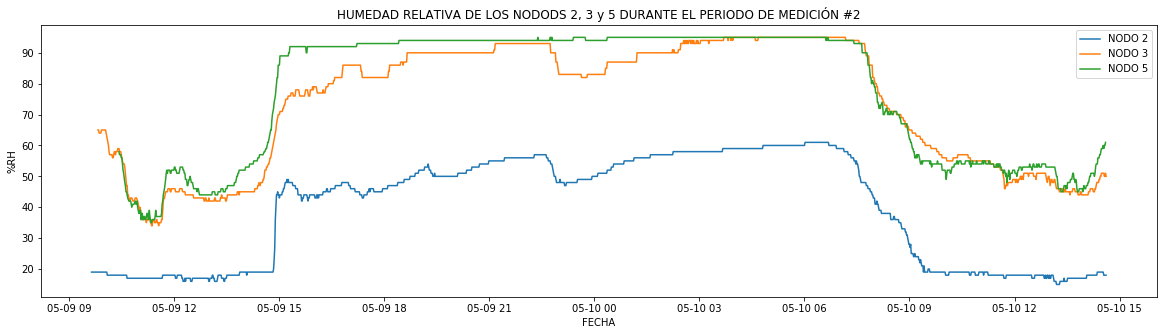

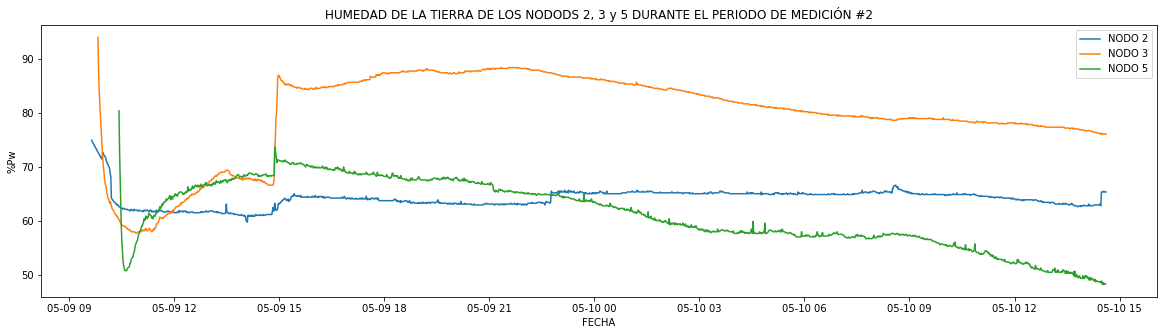

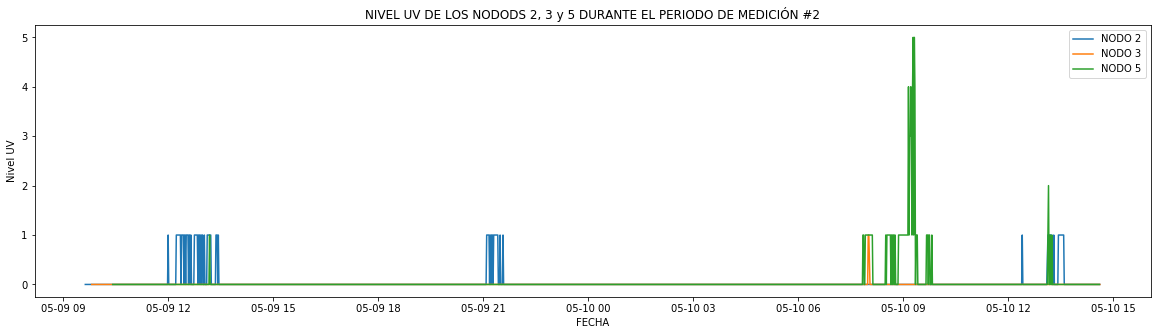

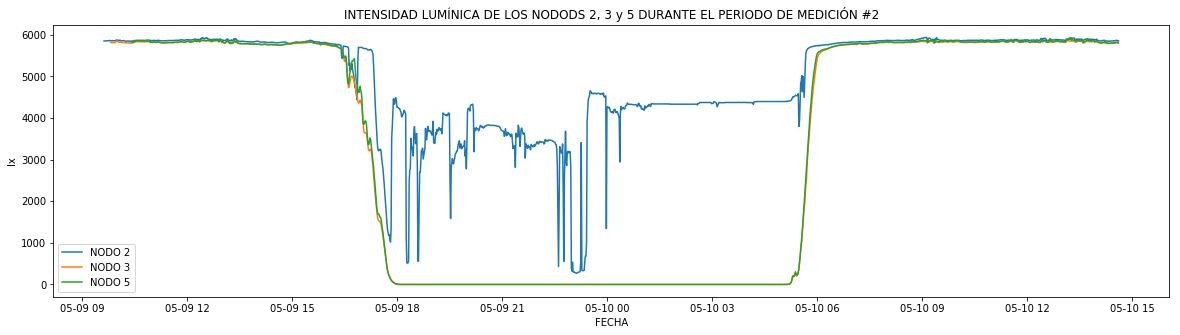

In [17]:
# Presenta los registros del segundo periodo de medición de los nodos 2, 3 y 5 
T = 1
mag = {0:'°C', 1:'%RH', 2:'%Pw', 3:'Nivel UV', 4:'lx'}
for i in range(5):
    plt.figure(figsize=[20,5])
    plt.title('%s DE LOS NODODS 2, 3 y 5 DURANTE EL PERIODO DE MEDICIÓN #%d'%(nodo[2][0].columns[i],T+1))
    plt.xlabel('FECHA')
    plt.ylabel(mag[i])
    plt.plot(nodo[2][0].iloc[:,i],label='NODO 2')
    plt.plot(nodo[3][0].iloc[:,i],label='NODO 3')
    plt.plot(nodo[5][0].iloc[:,i],label='NODO 5')
    plt.legend()

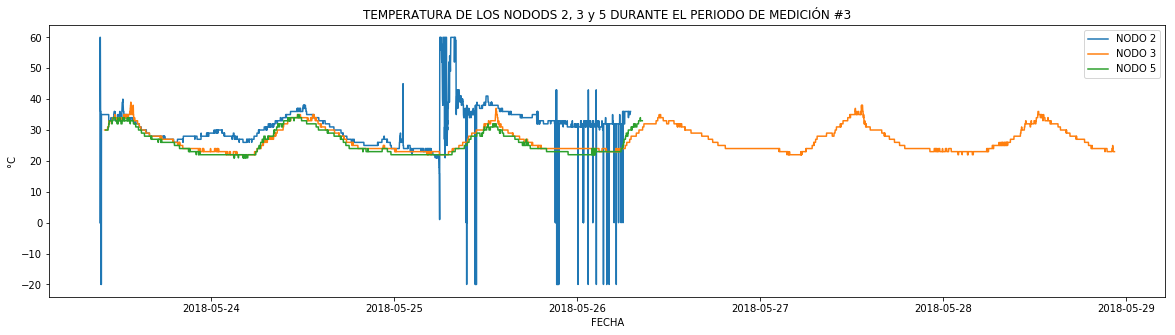

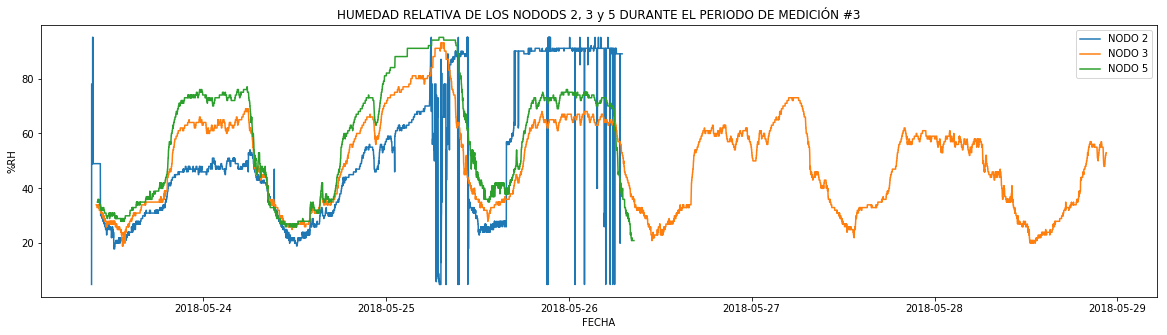

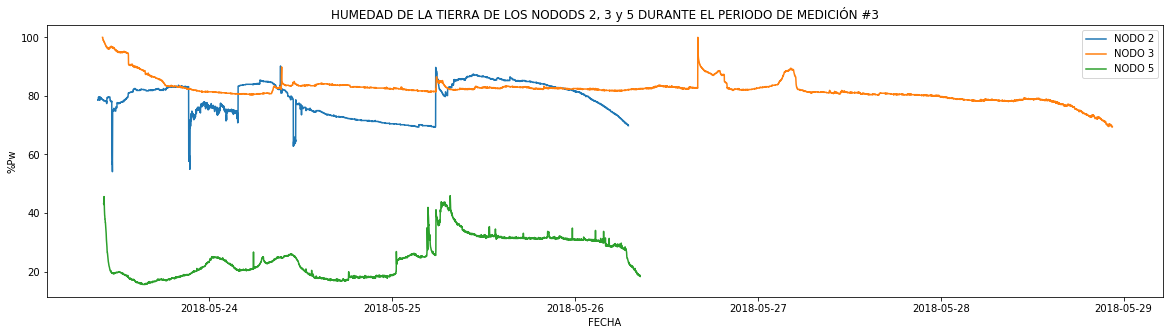

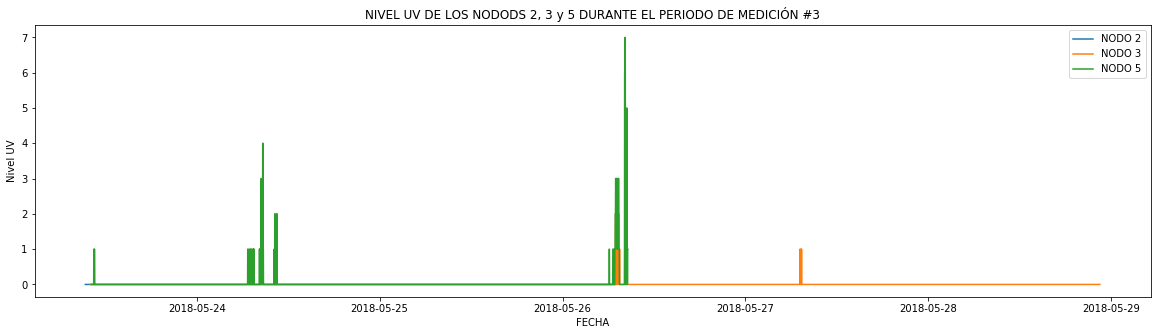

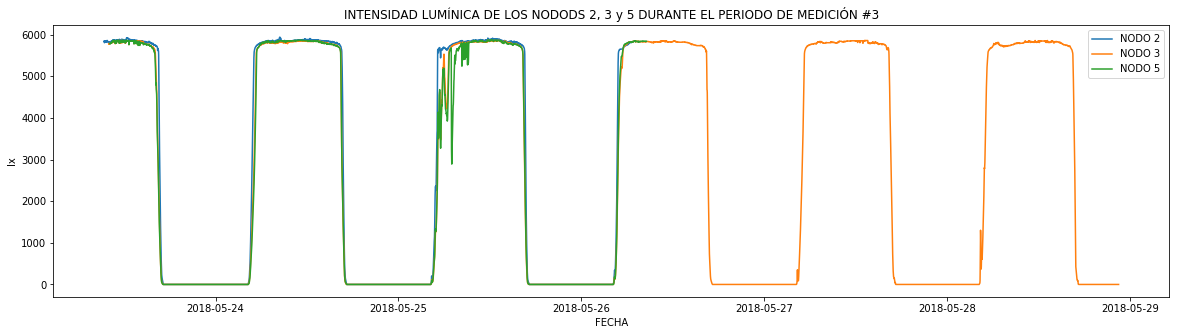

In [18]:
# Presenta los registros del tercer periodo de los nodos 2, 3 y 5 
T = 2
mag = {0:'°C', 1:'%RH', 2:'%Pw', 3:'Nivel UV', 4:'lx'}
for i in range(5):
    plt.figure(figsize=[20,5])
    plt.title('%s DE LOS NODODS 2, 3 y 5 DURANTE EL PERIODO DE MEDICIÓN #%d'%(nodo[2][0].columns[i],T+1))
    plt.xlabel('FECHA')
    plt.ylabel(mag[i])
    plt.plot(nodo[2][1].iloc[:,i],label='NODO 2')
    plt.plot(nodo[3][1].iloc[:,i],label='NODO 3')
    plt.plot(nodo[5][1].iloc[:,i],label='NODO 5')
    plt.legend()

In [19]:
nodo[3][1].to_csv('nodo3.csv')
nodo[5][1].to_csv('nodo5.csv')

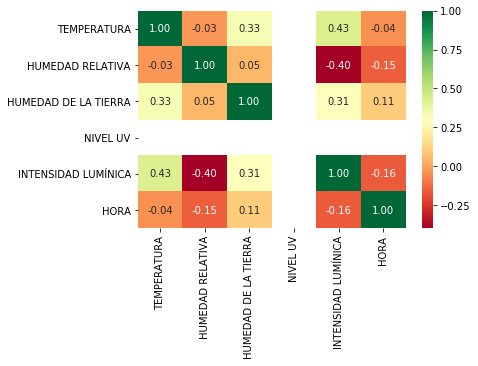

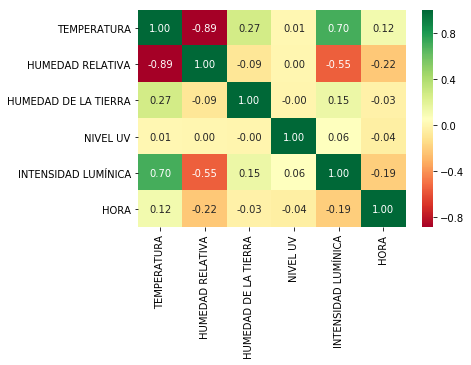

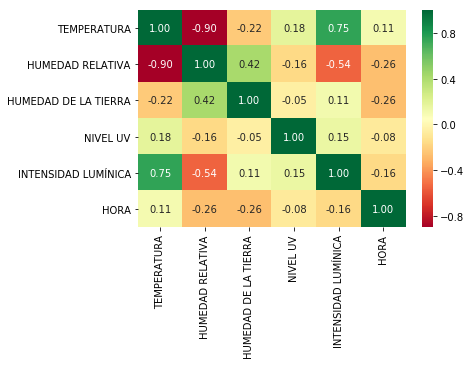

In [20]:
for i in [2,3,5]:
    plt.figure()
    sns.heatmap(nodo[i][1].corr(), annot=True, cmap='RdYlGn',fmt=".2f")

In [21]:
(nodo[2][1]).to_csv('nodo2.csv')

In [22]:
f=[]
for i in nodo:
   f.append(nodo[i]) 
nodo[2][1]

,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA
2018-05-23 09:22:00,0.00,5.00,78.66,0.00,5841.00,9.00
2018-05-23 09:23:00,60.00,78.00,78.66,0.00,5841.00,9.00
2018-05-23 09:24:00,60.00,78.00,78.50,0.00,5847.00,9.00
2018-05-23 09:25:00,60.00,78.00,78.66,0.00,5806.00,9.00
2018-05-23 09:27:00,36.00,49.00,79.30,0.00,5847.00,9.00
2018-05-23 09:28:00,36.00,49.00,79.62,0.00,5847.00,9.00
2018-05-23 09:29:00,36.00,49.00,79.30,0.00,5841.00,9.00
2018-05-23 09:30:00,36.00,49.00,79.30,0.00,5841.00,9.00
2018-05-23 09:31:00,-20.00,95.00,79.30,0.00,5841.00,9.00
2018-05-23 09:32:00,35.00,49.00,79.46,0.00,5841.00,9.00
